In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cleaner chart style
plt.style.use("ggplot")

file_path = "../data/processed/columbus_oh.zipcodes.csv"

df = pd.read_csv(file_path)

df.head()


,period_begin,period_end,region,city,state_code,median_sale_price,homes_sold,inventory,median_dom,months_of_supply
0,2020-05-01,2020-07-31,Zip Code: 43074,NaN,OH,339530.0,61.0,47.0,67.0,2.311475
1,2012-07-01,2012-09-30,Zip Code: 43076,NaN,OH,178500.0,27.0,80.0,153.0,8.888889
2,2022-11-01,2023-01-31,Zip Code: 43074,NaN,OH,475000.0,53.0,76.0,100.0,4.301887
3,2021-07-01,2021-09-30,Zip Code: 43138,NaN,OH,175000.0,58.0,42.0,49.0,2.172414
4,2013-10-01,2013-12-31,Zip Code: 43344,NaN,OH,85000.0,13.0,22.0,73.0,5.076923


In [4]:
df["period_begin"] = pd.to_datetime(df["period_begin"])
df = df.sort_values("period_begin")

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53999 entries, 9435 to 20694
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period_begin       53999 non-null  datetime64[ns]
 1   period_end         53999 non-null  object        
 2   region             53999 non-null  object        
 3   city               0 non-null      float64       
 4   state_code         53999 non-null  object        
 5   median_sale_price  53999 non-null  float64       
 6   homes_sold         53999 non-null  float64       
 7   inventory          49111 non-null  float64       
 8   median_dom         53725 non-null  float64       
 9   months_of_supply   49111 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 4.5+ MB


In [5]:
print("ZIP codes in dataset:", df["region"].nunique())
print("Date range:", df["period_begin"].min(), "to", df["period_begin"].max())

df["region"].unique()[:15]


ZIP codes in dataset: 137
Date range: 2012-01-01 00:00:00 to 2025-09-01 00:00:00


array(['Zip Code: 43153', 'Zip Code: 43126', 'Zip Code: 43221',
       'Zip Code: 43062', 'Zip Code: 43228', 'Zip Code: 43076',
       'Zip Code: 43146', 'Zip Code: 43215', 'Zip Code: 43055',
       'Zip Code: 43213', 'Zip Code: 43061', 'Zip Code: 43230',
       'Zip Code: 43338', 'Zip Code: 43045', 'Zip Code: 43229'],
      dtype=object)

In [6]:
zip_choice = df["region"].unique()[0]   # first ZIP by default
zip_choice


'Zip Code: 43153'

In [7]:
zip_df = df[df["region"] == zip_choice]
zip_df.head()


,period_begin,period_end,region,city,state_code,median_sale_price,homes_sold,inventory,median_dom,months_of_supply
9435,2012-01-01,2012-03-31,Zip Code: 43153,NaN,OH,10000.0,1.0,8.0,126.0,24.00
32032,2012-01-01,2012-03-31,Zip Code: 43153,NaN,OH,10000.0,1.0,8.0,126.0,24.00
8375,2012-02-01,2012-04-30,Zip Code: 43153,NaN,OH,10000.0,1.0,9.0,126.0,27.00
24278,2012-02-01,2012-04-30,Zip Code: 43153,NaN,OH,10000.0,1.0,9.0,126.0,27.00
30106,2012-03-01,2012-05-31,Zip Code: 43153,NaN,OH,19750.0,4.0,7.0,134.5,5.25


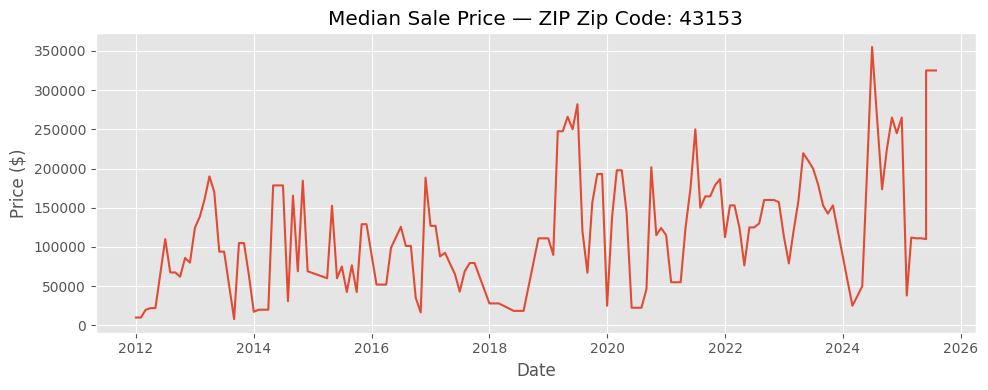

In [8]:
plt.figure(figsize=(10,4))
plt.plot(zip_df["period_begin"], zip_df["median_sale_price"])
plt.title(f"Median Sale Price — ZIP {zip_choice}")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()


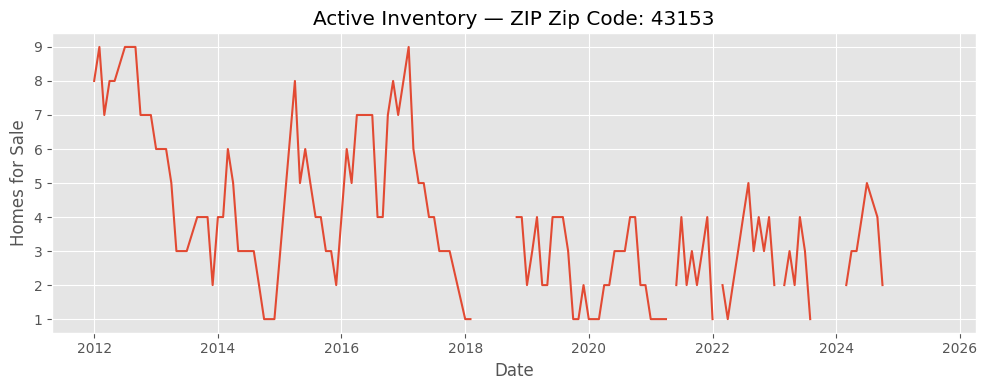

In [9]:
plt.figure(figsize=(10,4))
plt.plot(zip_df["period_begin"], zip_df["inventory"])
plt.title(f"Active Inventory — ZIP {zip_choice}")
plt.xlabel("Date")
plt.ylabel("Homes for Sale")
plt.tight_layout()
plt.show()


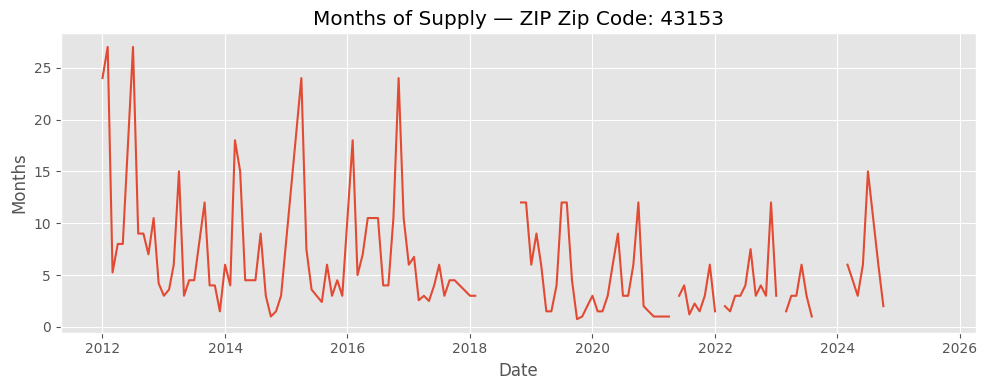

In [10]:
plt.figure(figsize=(10,4))
plt.plot(zip_df["period_begin"], zip_df["months_of_supply"])
plt.title(f"Months of Supply — ZIP {zip_choice}")
plt.xlabel("Date")
plt.ylabel("Months")
plt.tight_layout()
plt.show()


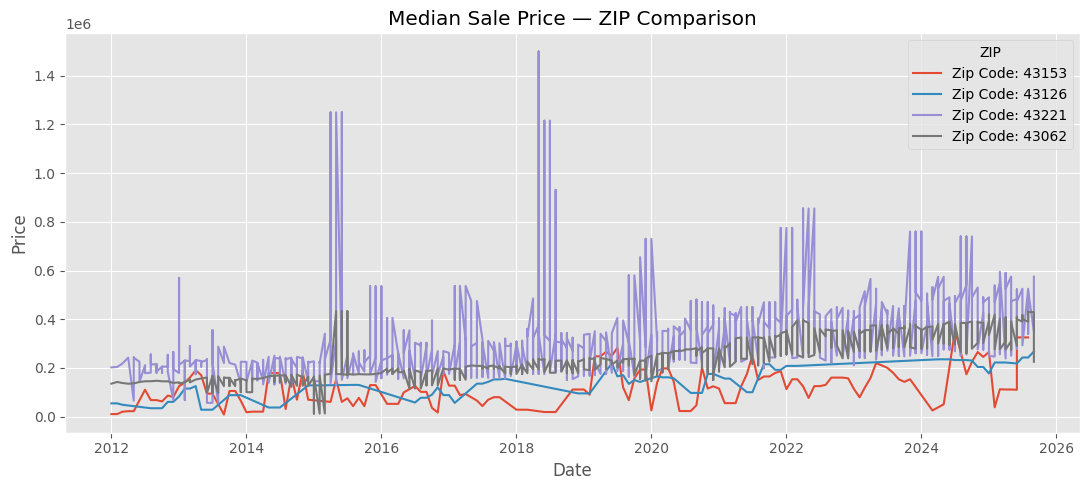

In [11]:
compare_zips = list(df["region"].unique()[:4])   # first 4 ZIPs
compare_df = df[df["region"].isin(compare_zips)]

plt.figure(figsize=(11,5))

for z in compare_zips:
    sub = compare_df[compare_df["region"] == z]
    plt.plot(sub["period_begin"], sub["median_sale_price"], label=z)

plt.legend(title="ZIP")
plt.title("Median Sale Price — ZIP Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()
